In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import keras

Using TensorFlow backend.


In [25]:
#Let's start with a Random Forest Predictor, with 5 cross-validation sets
#using the 2nd prediction set, let's see how many nodes are necessary for a good fit to the training set.

train_f_score=[]
j=2
for k in [5, 10, 20, 40, 60, 80, 100, 150]:
    f_score_values=[]
    true_pos_scores=[]
    false_pos_scores=[]
    false_neg_scores=[]
    #Cross Validation Groups
    for i in range(5):
        temp=list(range(5))
        temp.remove(i)
        #this is our set that is removed from training for validation
        val=training_nonoble[i::5]
        #training set consists of the other values
        train_X=[training_nonoble[temp[0]::5], training_nonoble[temp[1]::5], training_nonoble[temp[2]::5], training_nonoble[temp[3]::5]]
        train_X=pd.concat(train_X)
        model=RandomForestClassifier(k, n_jobs=-1)
        fit=model.fit(train_X[col_names], train_X['stabilityVec%s' % j])
        rf_prediction=fit.predict(train_X[col_names])
        temp=rf_prediction-train_X['stabilityVec%s' % j]
        false_pos=sum(temp==1)
        false_neg=sum(temp==-1)
        temp=rf_prediction+train_X['stabilityVec%s' % j]
        true_pos=sum(temp==2)
        precision=true_pos/(true_pos+false_pos)
        recall=true_pos/(true_pos+false_neg)
        f_score=2*precision*recall/(precision+recall)
        f_score_values.append(f_score)
        true_pos_scores.append(true_pos)
        false_pos_scores.append(false_pos)
        false_neg_scores.append(false_neg)
    train_f_score.append(np.mean(f_score_values))
    print('with %s nodes, the mean f-score is %.2f' % (str(k), np.mean(f_score_values)))
    print('True Positives: %d, False Positives: %d, False Negatives: %d' % (np.mean(true_pos_scores), \
            np.mean(false_pos_scores), np.mean(false_neg_scores)))

with 5 nodes, the mean f-score is 0.96
True Positives: 452, False Positives: 14, False Negatives: 26
with 10 nodes, the mean f-score is 0.98
True Positives: 459, False Positives: 1, False Negatives: 18
with 20 nodes, the mean f-score is 0.99
True Positives: 474, False Positives: 0, False Negatives: 4
with 40 nodes, the mean f-score is 1.00
True Positives: 477, False Positives: 0, False Negatives: 0
with 60 nodes, the mean f-score is 1.00
True Positives: 478, False Positives: 0, False Negatives: 0
with 80 nodes, the mean f-score is 1.00
True Positives: 478, False Positives: 0, False Negatives: 0
with 100 nodes, the mean f-score is 1.00
True Positives: 478, False Positives: 0, False Negatives: 0
with 150 nodes, the mean f-score is 1.00
True Positives: 478, False Positives: 0, False Negatives: 0


In [26]:
#Wow, nearly perfect fits for even the smallest set of nodes. Let's see how they perform on the test set.

test_f_score=[]
j=2
for k in [5, 10, 20, 40, 60, 80, 100, 150]:
    f_score_values=[]
    true_pos_scores=[]
    false_pos_scores=[]
    false_neg_scores=[]
    #Cross Validation Groups
    for i in range(5):
        temp=list(range(5))
        temp.remove(i)
        #this is our set that is removed from training for validation
        val=training_nonoble[i::5]
        #training set consists of the other values
        train_X=[training_nonoble[temp[0]::5], training_nonoble[temp[1]::5], training_nonoble[temp[2]::5], training_nonoble[temp[3]::5]]
        train_X=pd.concat(train_X)
        model=RandomForestClassifier(k, n_jobs=-1)
        fit=model.fit(train_X[col_names], train_X['stabilityVec%s' % j])
        rf_prediction=fit.predict(val[col_names])
        temp=rf_prediction-val['stabilityVec%s' % j]
        false_pos=sum(temp==1)
        false_neg=sum(temp==-1)
        temp=rf_prediction+val['stabilityVec%s' % j]
        true_pos=sum(temp==2)
        precision=true_pos/(true_pos+false_pos)
        recall=true_pos/(true_pos+false_neg)
        f_score=2*precision*recall/(precision+recall)
        f_score_values.append(f_score)
        true_pos_scores.append(true_pos)
        false_pos_scores.append(false_pos)
        false_neg_scores.append(false_neg)
    test_f_score.append(np.mean(f_score_values))
    print('with %s nodes, the mean f-score is %.2f' % (str(k), np.mean(f_score_values)))
    print('True Positives: %d, False Positives: %d, False Negatives: %d' % (np.mean(true_pos_scores), \
            np.mean(false_pos_scores), np.mean(false_neg_scores)))
    

with 5 nodes, the mean f-score is 0.66
True Positives: 75, False Positives: 33, False Negatives: 44
with 10 nodes, the mean f-score is 0.65
True Positives: 67, False Positives: 21, False Negatives: 52
with 20 nodes, the mean f-score is 0.67
True Positives: 72, False Positives: 22, False Negatives: 47
with 40 nodes, the mean f-score is 0.69
True Positives: 74, False Positives: 22, False Negatives: 44
with 60 nodes, the mean f-score is 0.70
True Positives: 76, False Positives: 22, False Negatives: 43
with 80 nodes, the mean f-score is 0.69
True Positives: 76, False Positives: 25, False Negatives: 43
with 100 nodes, the mean f-score is 0.70
True Positives: 76, False Positives: 23, False Negatives: 43
with 150 nodes, the mean f-score is 0.70
True Positives: 76, False Positives: 22, False Negatives: 43


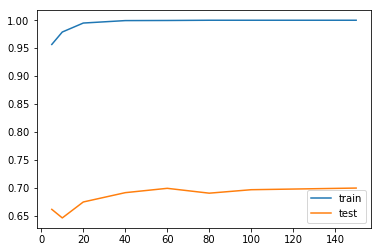

In [27]:
#the random forest seems to be doing very well with this data set, and there doesn't seem to be any evidence of
#overfitting.
plt.plot([5, 10, 20, 40, 60, 80, 100, 150], train_f_score, label='train')
plt.plot([5, 10, 20, 40, 60, 80, 100, 150], test_f_score, label='test')
plt.legend()
plt.show()

In [28]:
#I'm going to try again with a more sparsely populated vector here:

train_f_score=[]
j=1
for k in [5, 10, 20, 40, 60, 80, 100, 150]:
    f_score_values=[]
    true_pos_scores=[]
    false_pos_scores=[]
    false_neg_scores=[]
    #Cross Validation Groups
    for i in range(5):
        temp=list(range(5))
        temp.remove(i)
        #this is our set that is removed from training for validation
        val=training_nonoble[i::5]
        #training set consists of the other values
        train_X=[training_nonoble[temp[0]::5], training_nonoble[temp[1]::5], training_nonoble[temp[2]::5], training_nonoble[temp[3]::5]]
        train_X=pd.concat(train_X)
        model=RandomForestClassifier(k, n_jobs=-1)
        fit=model.fit(train_X[col_names], train_X['stabilityVec%s' % j])
        rf_prediction=fit.predict(train_X[col_names])
        temp=rf_prediction-train_X['stabilityVec%s' % j]
        false_pos=sum(temp==1)
        false_neg=sum(temp==-1)
        temp=rf_prediction+train_X['stabilityVec%s' % j]
        true_pos=sum(temp==2)
        precision=true_pos/(true_pos+false_pos)
        recall=true_pos/(true_pos+false_neg)
        f_score=2*precision*recall/(precision+recall)
        f_score_values.append(f_score)
        true_pos_scores.append(true_pos)
        false_pos_scores.append(false_pos)
        false_neg_scores.append(false_neg)
    train_f_score.append(np.mean(f_score_values))
    print('with %s nodes, the mean f-score is %.2f' % (str(k), np.mean(f_score_values)))
    print('True Positives: %d, False Positives: %d, False Negatives: %d' % (np.mean(true_pos_scores), \
            np.mean(false_pos_scores), np.mean(false_neg_scores)))

with 5 nodes, the mean f-score is 0.91
True Positives: 59, False Positives: 0, False Negatives: 11
with 10 nodes, the mean f-score is 0.93
True Positives: 61, False Positives: 0, False Negatives: 8
with 20 nodes, the mean f-score is 0.99
True Positives: 68, False Positives: 0, False Negatives: 1
with 40 nodes, the mean f-score is 0.99
True Positives: 69, False Positives: 0, False Negatives: 0
with 60 nodes, the mean f-score is 1.00
True Positives: 70, False Positives: 0, False Negatives: 0
with 80 nodes, the mean f-score is 1.00
True Positives: 70, False Positives: 0, False Negatives: 0
with 100 nodes, the mean f-score is 1.00
True Positives: 70, False Positives: 0, False Negatives: 0
with 150 nodes, the mean f-score is 1.00
True Positives: 70, False Positives: 0, False Negatives: 0


In [29]:
#Wow, nearly perfect fits for even the smallest set of nodes. Let's see how they perform on the test set.

test_f_score=[]
j=1
for k in [5, 10, 20, 40, 60, 80, 100, 150]:
    f_score_values=[]
    true_pos_scores=[]
    false_pos_scores=[]
    false_neg_scores=[]
    #Cross Validation Groups
    for i in range(5):
        temp=list(range(5))
        temp.remove(i)
        #this is our set that is removed from training for validation
        val=training_nonoble[i::5]
        #training set consists of the other values
        train_X=[training_nonoble[temp[0]::5], training_nonoble[temp[1]::5], training_nonoble[temp[2]::5], training_nonoble[temp[3]::5]]
        train_X=pd.concat(train_X)
        model=RandomForestClassifier(k, n_jobs=-1)
        fit=model.fit(train_X[col_names], train_X['stabilityVec%s' % j])
        rf_prediction=fit.predict(val[col_names])
        temp=rf_prediction-val['stabilityVec%s' % j]
        false_pos=sum(temp==1)
        false_neg=sum(temp==-1)
        temp=rf_prediction+val['stabilityVec%s' % j]
        true_pos=sum(temp==2)
        precision=true_pos/(true_pos+false_pos)
        recall=true_pos/(true_pos+false_neg)
        f_score=2*precision*recall/(precision+recall)
        f_score_values.append(f_score)
        true_pos_scores.append(true_pos)
        false_pos_scores.append(false_pos)
        false_neg_scores.append(false_neg)
    test_f_score.append(np.mean(f_score_values))
    print('with %s nodes, the mean f-score is %.2f' % (str(k), np.mean(f_score_values)))
    print('True Positives: %d, False Positives: %d, False Negatives: %d' % (np.mean(true_pos_scores), \
            np.mean(false_pos_scores), np.mean(false_neg_scores)))

with 5 nodes, the mean f-score is 0.31
True Positives: 4, False Positives: 4, False Negatives: 13
with 10 nodes, the mean f-score is 0.27
True Positives: 3, False Positives: 1, False Negatives: 14


/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in long_scalars


with 20 nodes, the mean f-score is nan
True Positives: 2, False Positives: 1, False Negatives: 15
with 40 nodes, the mean f-score is 0.29
True Positives: 3, False Positives: 1, False Negatives: 14
with 60 nodes, the mean f-score is 0.23
True Positives: 2, False Positives: 1, False Negatives: 15
with 80 nodes, the mean f-score is 0.26
True Positives: 2, False Positives: 1, False Negatives: 14
with 100 nodes, the mean f-score is 0.29
True Positives: 3, False Positives: 0, False Negatives: 14
with 150 nodes, the mean f-score is 0.26
True Positives: 2, False Positives: 1, False Negatives: 14


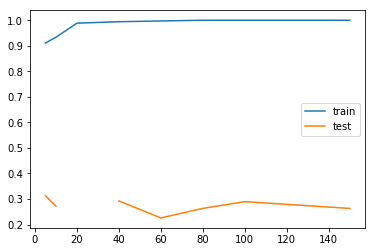

In [30]:
#Again, this is a pretty good performance, with no evidence of overfitting.
plt.plot([5, 10, 20, 40, 60, 80, 100, 150], train_f_score, label='train')
plt.plot([5, 10, 20, 40, 60, 80, 100, 150], test_f_score, label='test')
plt.legend()
plt.show()

In [37]:
#Let's go for 100 nodes and loop over all 9 of the vectors.
for j in range(9):
    f_score_values=[]
    true_pos_scores=[]
    false_pos_scores=[]
    false_neg_scores=[]
    #Cross Validation Groups
    for i in range(5):
        temp=list(range(5))
        temp.remove(i)
        #this is our set that is removed from training for validation
        val=training_nonoble[i::5]
        #training set consists of the other values
        train_X=[training_nonoble[temp[0]::5], training_nonoble[temp[1]::5], training_nonoble[temp[2]::5], training_nonoble[temp[3]::5]]
        train_X=pd.concat(train_X)
        model=RandomForestClassifier(100, n_jobs=-1)
        fit=model.fit(train_X[col_names], train_X['stabilityVec%s' % j])
        rf_prediction=fit.predict(val[col_names])
        temp=rf_prediction-val['stabilityVec%s' % j]
        false_pos=sum(temp==1)
        false_neg=sum(temp==-1)
        temp=rf_prediction+val['stabilityVec%s' % j]
        true_pos=sum(temp==2)
        precision=true_pos/(true_pos+false_pos)
        recall=true_pos/(true_pos+false_neg)
        f_score=2*precision*recall/(precision+recall)
        if np.isnan(f_score): f_score=0
        f_score_values.append(f_score)
        true_pos_scores.append(true_pos)
        false_pos_scores.append(false_pos)
        false_neg_scores.append(false_neg)
    print('for vector %s, the mean f-score is %.2f' % (str(j), np.mean(f_score_values)))
    print('True Positives: %d, False Positives: %d, False Negatives: %d' % (np.mean(true_pos_scores), \
            np.mean(false_pos_scores), np.mean(false_neg_scores)))
    

for vector 0, the mean f-score is 0.32
True Positives: 2, False Positives: 1, False Negatives: 7
for vector 1, the mean f-score is 0.22
True Positives: 2, False Positives: 0, False Negatives: 15
for vector 2, the mean f-score is 0.69
True Positives: 75, False Positives: 22, False Negatives: 44
for vector 3, the mean f-score is 0.39
True Positives: 9, False Positives: 3, False Negatives: 25
for vector 4, the mean f-score is 0.70
True Positives: 72, False Positives: 18, False Negatives: 44
for vector 5, the mean f-score is 0.40
True Positives: 10, False Positives: 3, False Negatives: 26
for vector 6, the mean f-score is 0.48
True Positives: 26, False Positives: 11, False Negatives: 45
for vector 7, the mean f-score is 0.56
True Positives: 35, False Positives: 12, False Negatives: 42
for vector 8, the mean f-score is 0.41
True Positives: 3, False Positives: 1, False Negatives: 8


In [38]:
#Not bad! Now, let's give gradient boosting a try.
for j in range(9):
    f_score_values=[]
    true_pos_scores=[]
    false_pos_scores=[]
    false_neg_scores=[]
    #Cross Validation Groups
    for i in range(5):
        temp=list(range(5))
        temp.remove(i)
        #this is our set that is removed from training for validation
        val=training_nonoble[i::5]
        #training set consists of the other values
        train_X=[training_nonoble[temp[0]::5], training_nonoble[temp[1]::5], training_nonoble[temp[2]::5], training_nonoble[temp[3]::5]]
        train_X=pd.concat(train_X)
        model=GradientBoostingClassifier()
        fit=model.fit(train_X[col_names], train_X['stabilityVec%s' % j])
        gb_prediction=fit.predict(val[col_names])
        temp=gb_prediction-val['stabilityVec%s' % j]
        false_pos=sum(temp==1)
        false_neg=sum(temp==-1)
        temp=gb_prediction+val['stabilityVec%s' % j]
        true_pos=sum(temp==2)
        precision=true_pos/(true_pos+false_pos)
        recall=true_pos/(true_pos+false_neg)
        f_score=2*precision*recall/(precision+recall)
        if np.isnan(f_score): f_score=0
        f_score_values.append(f_score)
        true_pos_scores.append(true_pos)
        false_pos_scores.append(false_pos)
        false_neg_scores.append(false_neg)
    print('for vector %s, the mean f-score is %.2f' % (str(j), np.mean(f_score_values)))
    print('True Positives: %d, False Positives: %d, False Negatives: %d' % (np.mean(true_pos_scores), \
            np.mean(false_pos_scores), np.mean(false_neg_scores)))

for vector 0, the mean f-score is 0.29
True Positives: 2, False Positives: 4, False Negatives: 7
for vector 1, the mean f-score is 0.34
True Positives: 4, False Positives: 2, False Negatives: 13
for vector 2, the mean f-score is 0.67
True Positives: 70, False Positives: 21, False Negatives: 49
for vector 3, the mean f-score is 0.33
True Positives: 8, False Positives: 6, False Negatives: 26
for vector 4, the mean f-score is 0.66
True Positives: 67, False Positives: 21, False Negatives: 49
for vector 5, the mean f-score is 0.37
True Positives: 9, False Positives: 5, False Negatives: 27
for vector 6, the mean f-score is 0.46
True Positives: 25, False Positives: 10, False Negatives: 47
for vector 7, the mean f-score is 0.52
True Positives: 33, False Positives: 14, False Negatives: 45
for vector 8, the mean f-score is 0.37
True Positives: 3, False Positives: 5, False Negatives: 8


In [91]:
#The two are pretty similar, which makes sense. I'll go ahead and make a prediction on the test dataset, though 
#I am still waiting on some results for neural nets before I decide which to ultimately use for my submission.

#Test data was processed identically to the training data and normalized the same way, removing noble gases and
#then dividing by the max value of each column.

#Sanity check ratios are included.

for j in range(9):
    model=GradientBoostingClassifier()
    fit=model.fit(training_nonoble[col_names], training_nonoble['stabilityVec%s' % j])
    gb_prediction=fit.predict(training_nonoble[col_names])
    print('Training set vector %s prediction ratio is %.2f' %(j, np.sum(gb_prediction)/len(gb_prediction)))
    gb_prediction=fit.predict(test[col_names])
    print('Test set vector %s prediction ratio is %.2f' %(j, np.sum(gb_prediction)/len(gb_prediction)))
    test['stabilityVec%s' % j] = gb_prediction

Training set vector 0 prediction ratio is 0.02
Test set vector 0 prediction ratio is 0.05
Training set vector 1 prediction ratio is 0.03
Test set vector 1 prediction ratio is 0.06
Training set vector 2 prediction ratio is 0.21
Test set vector 2 prediction ratio is 0.20
Training set vector 3 prediction ratio is 0.05
Test set vector 3 prediction ratio is 0.06
Training set vector 4 prediction ratio is 0.21
Test set vector 4 prediction ratio is 0.24
Training set vector 5 prediction ratio is 0.05
Test set vector 5 prediction ratio is 0.04
Training set vector 6 prediction ratio is 0.10
Test set vector 6 prediction ratio is 0.12
Training set vector 7 prediction ratio is 0.12
Test set vector 7 prediction ratio is 0.11
Training set vector 8 prediction ratio is 0.03
Test set vector 8 prediction ratio is 0.08


In [96]:
#Those numbers look reasonable.
#Setting noble gas predictions to zero
for i in range(len(test)):
    if test['formulaA'][i] in ['Ne', 'Ar', 'Kr', 'He', 'Xe']:
        for j in range(9):
            test['stabilityVec%s' % j][i]=0
    
    if test['formulaB'][i] in ['Ne', 'Ar', 'Kr', 'He', 'Xe']:
        for j in range(9):
            test['stabilityVec%s' % j][i]=0

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [123]:
#reformat the data into a .1 float string of values
test['stabilityVec'][i]='[1.0,'
for i in range(len(test)):
    for j in range(9):
        test['stabilityVec'][i]+='%.1f,' % test['stabilityVec%s' % j][i]
    test['stabilityVec'][i]+='1.0]'

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [126]:
test['stabilityVec'].head(n=25)

0     [1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
1     [1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
2     [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
3     [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
4     [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
5     [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
6     [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
7     [1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]
8     [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
9     [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]
10    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
11    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0]
12    [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]
13    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
14    [1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0]
15    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
16    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
17    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
18    [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0]
19    [1.0,0

In [127]:
#Hope its reasonably right! Time to save the values
test.to_csv('test_data_output.csv')

In [128]:
#Double Check
temp=pd.read_csv('test_data_output.csv')
temp['stabilityVec'].head()

0    [1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
1    [1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
2    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
3    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
4    [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
Name: stabilityVec, dtype: object

In [ ]:
#Looks OK! We'll see what happens.